In [34]:
#!pip install pydot

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Embedding, Conv1D, Flatten, Dense
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
import seaborn as sns
import plotly.graph_objects as go
from keras.optimizers import RMSprop
from sklearn.metrics import accuracy_score
from keras.utils import plot_model
from IPython.display import Image
from sklearn.feature_extraction.text import TfidfVectorizer
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, ParameterGrid
from sklearn import preprocessing
import time
from sklearn import metrics
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
import pickle

# Scipy
import scipy
from scipy import sparse
from scipy.sparse import csr_matrix

2023-10-09 19:55:26.545529: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-10-09 19:55:26.564788: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-09 19:55:26.700398: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-09 19:55:26.701744: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-09 19:55:27.355157: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not fin

In [2]:
df = pd.read_csv('data/df_sem_duplicatas.csv')

In [3]:
le = preprocessing.LabelEncoder()
le.fit(df['categoria'])
df['Categoria'] = le.transform(df['categoria'])

In [4]:
# Feature-target split
X, y = df.drop('Categoria', axis = 1), df['Categoria']

# Train-test split (from complete data)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 40)
data_train = pd.concat([X_train, y_train], axis = 1)

# Validation-test split (from test data)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size = 0.5, random_state = 40)
data_val, data_test = pd.concat([X_val, y_val], axis = 1), pd.concat([X_test, y_test], axis = 1)

# Comparison of sizes of training set, validation set and test set
values = np.array([len(data_train), len(data_val), len(data_test)])
labels = ['Training set', 'Validation Set', 'Test set']
fig = go.Figure(data = [go.Pie(values = values, labels = labels, hole = 0.5, textinfo = 'percent', title = " ")])
text_title = "Comparison of sizes of training set, validation set and test set"
fig.update_layout(height = 500, width = 800, showlegend = True, title = dict(text = text_title, x = 0.5, y = 0.95))
fig.show()

In [5]:
# TF-IDF vectorization
TfidfVec = TfidfVectorizer(ngram_range = (1, 1))
X_train_tfidf = TfidfVec.fit_transform(X_train['descricao'].tolist())
X_val_tfidf = TfidfVec.transform(X_val['descricao'].tolist())

X_test_tfidf = TfidfVec.transform(X_test['descricao'].tolist())

## Modelo inicial

Executar sem passar parâmentros (Base line)

https://github.com/Herikc2/IoT-Previsao-de-Uso-de-Energia/blob/main/docs/IoT-Previsao-de-Uso-de-Energia.ipynb

In [26]:
def confusio_matrix(y_test, y_predicted):
  y_test_original = le.inverse_transform(y_test)
  y_pred_original = le.inverse_transform(pred)
  conf_matrix = confusion_matrix(y_test_original,y_pred_original)
  labels = np.unique(y_pred_original)
  plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
  plt.title('Matriz de Confusão')
  plt.colorbar()
  tick_marks = np.arange(len(labels))
  plt.xticks(tick_marks, labels)
  plt.yticks(tick_marks, labels)

  for i in range(len(labels)):
      for j in range(len(labels)):
          plt.text(j, i, str(conf_matrix[i, j]), horizontalalignment='center', verticalalignment='center')
  plt.ylabel('Rótulo Verdadeiro')
  plt.xlabel('Rótulo Predito')
  plt.show()

In [8]:
modelo = XGBClassifier(objective='binary:logistic', nthread=4, seed=42)

params = {
    'max_depth': range (2, 10, 1),
    'n_estimators': range(60, 220, 40),
    'learning_rate': [0.1, 0.01, 0.05]
}

grid = GridSearchCV(modelo, params, n_jobs = -1, cv = 5, scoring = None)
    
grid.fit(X_train_tfidf, y_train)
pred = grid.predict(X_test_tfidf)
modelo_ = grid.best_estimator_

print(grid.best_params_)
resultados_df = pd.DataFrame(grid.cv_results_)

/home/leonardosteil/www/Infnet-Produto/.conda/lib/python3.10/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/home/leonardosteil/www/Infnet-Produto/.conda/lib/python3.10/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/home/leonardosteil/www/Infnet-Produto/.conda/lib/python3.10/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/home/leonardosteil/www/Infnet-Produto/.conda/lib/python3.10/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/hom

{'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 180}


{'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 180}

In [28]:
grid.best_score_

0.9094273340644226

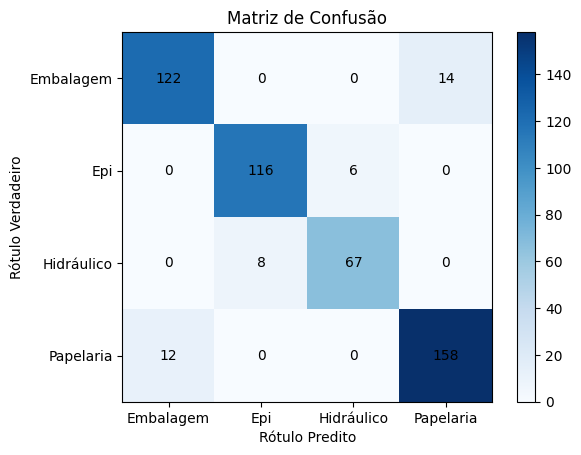

In [27]:
confusio_matrix(y_test,pred)

## Modelo 2

In [29]:
params = {
    'max_depth': [8],
    'n_estimators': [180],
    'learning_rate': [0.1],
    'min_child_weight': range(0, 10),
    'reg_lambda': range(1, 2),
}

grid = GridSearchCV(modelo, params, n_jobs = -1, cv = 5, scoring = None)
    
grid.fit(X_train_tfidf, y_train)
pred = grid.predict(X_test_tfidf)
modelo_ = grid.best_estimator_

print(grid.best_params_)
resultados_df = pd.DataFrame(grid.cv_results_)

/home/leonardosteil/www/Infnet-Produto/.conda/lib/python3.10/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/home/leonardosteil/www/Infnet-Produto/.conda/lib/python3.10/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/home/leonardosteil/www/Infnet-Produto/.conda/lib/python3.10/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/home/leonardosteil/www/Infnet-Produto/.conda/lib/python3.10/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/hom

{'learning_rate': 0.1, 'max_depth': 8, 'min_child_weight': 1, 'n_estimators': 180, 'reg_lambda': 1}


In [30]:
grid.best_score_

0.9094273340644226

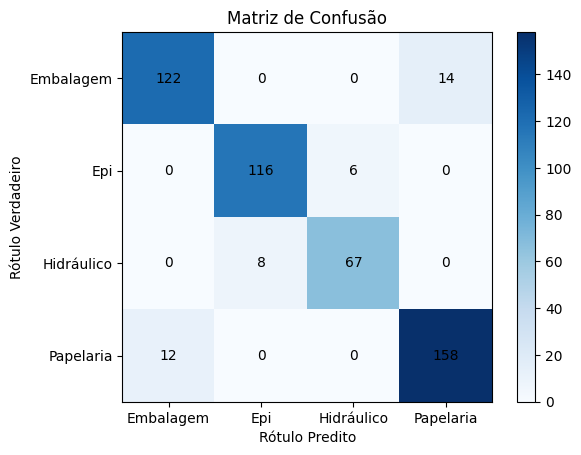

In [31]:
confusio_matrix(y_test,pred)

## MODELO 3

In [38]:
params = {
    'max_depth': [8],
    'n_estimators': [180],
    'learning_rate': [0.1],
    'min_child_weight': range(0, 10),
    'reg_lambda': range(1, 2),
}

grid = GridSearchCV(modelo, params, n_jobs = 10, cv = 10, scoring = None)
    
grid.fit(X_train_tfidf, y_train)
pred = grid.predict(X_test_tfidf)
modelo_ = grid.best_estimator_

print(grid.best_params_)
resultados_df = pd.DataFrame(grid.cv_results_)

/home/leonardosteil/www/Infnet-Produto/.conda/lib/python3.10/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/home/leonardosteil/www/Infnet-Produto/.conda/lib/python3.10/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/home/leonardosteil/www/Infnet-Produto/.conda/lib/python3.10/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/home/leonardosteil/www/Infnet-Produto/.conda/lib/python3.10/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/hom

{'learning_rate': 0.1, 'max_depth': 8, 'min_child_weight': 0, 'n_estimators': 180, 'reg_lambda': 1}


In [39]:
grid.best_score_

0.9084391012518456

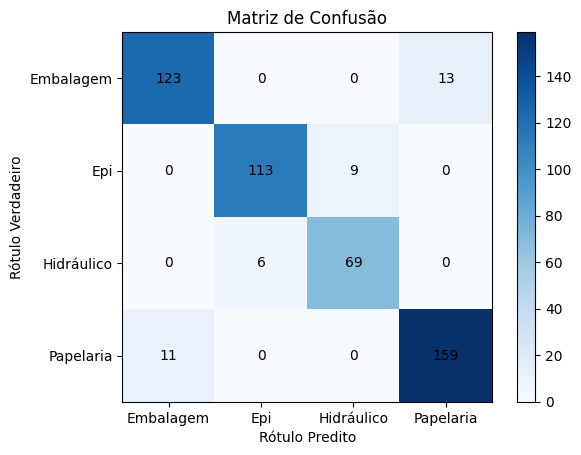

In [40]:
confusio_matrix(y_test,pred)

In [ ]:
# Salvando modelo como pickle
with open('models/xgboost.pkl', 'wb') as model_file:
    pickle.dump(modelo_, model_file)

In [ ]:
params_xgb = {
    'learning_rate': [0.03, 0.3],
    'min_child_weight': [0, 10],
    'n_estimators': [200],
    'reg_lambda': [1, 2],
    'seed': [40]
}

xgb = XGBClassifier()
best_model_xgb, best_params_xgb, best_score_xgb, count = xgb, ParameterGrid(params_xgb)[0], 0, 0
for g in ParameterGrid(params_xgb):
    time_start = time.time()
    count += 1
    #print(f"Gridpoint #{count}: {g}")
    xgb.set_params(**g)
    xgb.fit(X_train_tfidf, y_train)
    y_train_pred, y_val_pred = xgb.predict(X_train_tfidf), xgb.predict(X_val_tfidf)
    score_train, score_val = accuracy_score(y_train, y_train_pred), accuracy_score(y_val, y_val_pred)
    time_stop = time.time()
    m, s = int(time_stop - time_start) // 60, int(time_stop - time_start) % 60
    #print(f"Training accuracy: {score_train}, Validation accuracy: {score_val}, Runtime: {m}m{s}s")
    #print(" ")
    if score_val > best_score_xgb:
        best_params_xgb, best_score_xgb = g, score_val
best_model_x, best_params_x, best_score_x = XGBClassifier(), best_params_xgb, best_score_xgb
best_model_x.set_params(**best_params_x)
print(f"Best model: {best_model_x}")
print(" ")
print(f"Best parameters: {best_params_x}")
print(f"Best validation accuracy: {best_score_x}")


In [25]:
# Function to compute and print confusion matrix
def conf_mat(y_test, y_test_pred, figsize = (10, 8), font_scale = 1.2, annot_kws_size = 16):
    class_names = [0, 1, 2, 3] # ['Electronics', 'Household', 'Books', 'Clothing & Accessories']
    tick_marks_y = [0.5, 1.5, 2.5, 3.5]
    tick_marks_x = [0.5, 1.5, 2.5, 3.5]
    confusion_matrix = metrics.confusion_matrix(y_test, y_test_pred)
    confusion_matrix_df = pd.DataFrame(confusion_matrix, range(4), range(4))
    plt.figure(figsize = figsize)
    sns.set(font_scale = font_scale) # label size
    plt.title("Confusion Matrix")
    sns.heatmap(confusion_matrix_df, annot = True, annot_kws = {"size": annot_kws_size}, fmt = 'd') # font size
    plt.yticks(tick_marks_y, class_names, rotation = 'vertical')
    plt.xticks(tick_marks_x, class_names, rotation = 'horizontal')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.grid(False)
    plt.show()

In [58]:
# Best model
best_model, X_train_vec, X_test_vec = best_model_x, X_train_tfidf, X_test_tfidf

/home/leonardosteil/www/Infnet-Produto/.conda/lib/python3.10/site-packages/xgboost/data.py:520: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.



Test accuracy    0.930417
 


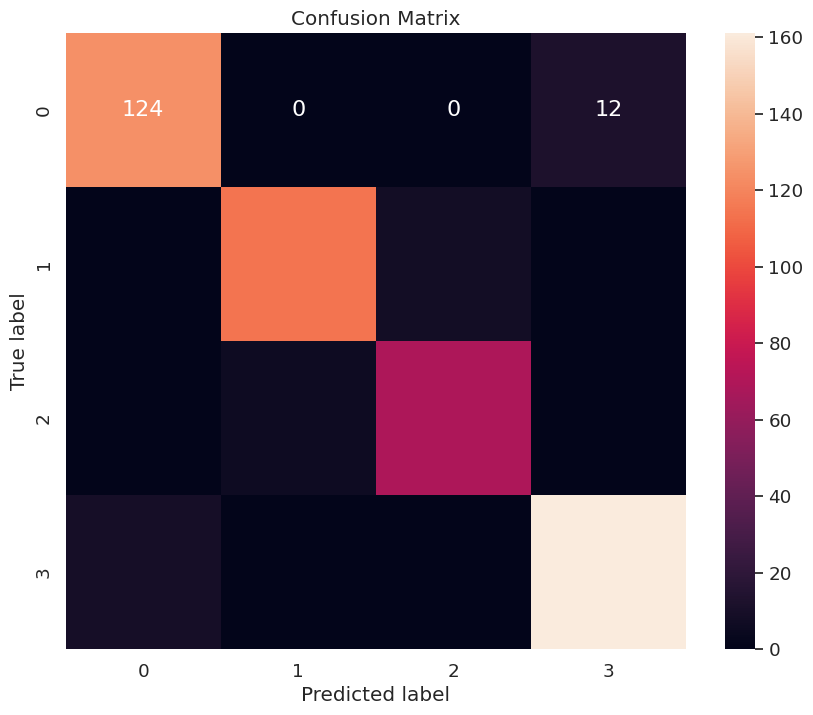

In [59]:
# Prediction and evaluation on test set
best_model.fit(X_train_vec, y_train)
y_test_pred = best_model.predict(X_test_vec)
score_test = accuracy_score(y_test, y_test_pred)
print(pd.Series({"Test accuracy": score_test}).to_string())
print(" ")
conf_mat(y_test, y_test_pred, figsize = (10, 8), font_scale = 1.2, annot_kws_size = 16) # Confusion matrix

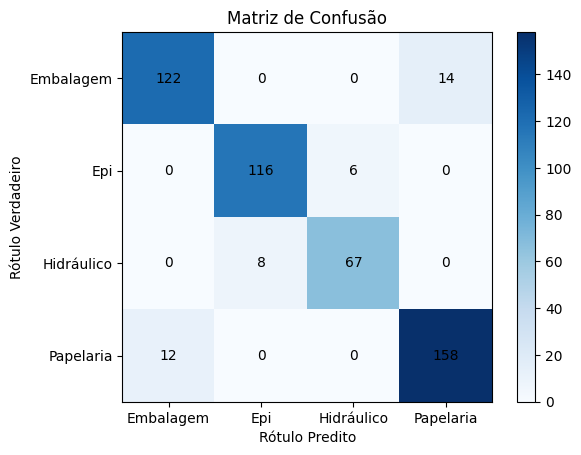

In [23]:
y_test_original = le.inverse_transform(y_test)
y_pred_original = le.inverse_transform(pred)
conf_matrix = confusion_matrix(y_test_original,y_pred_original)
labels = np.unique(y_pred_original)
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Matriz de Confusão')
plt.colorbar()
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels)
plt.yticks(tick_marks, labels)

for i in range(len(labels)):
    for j in range(len(labels)):
        plt.text(j, i, str(conf_matrix[i, j]), horizontalalignment='center', verticalalignment='center')
plt.ylabel('Rótulo Verdadeiro')
plt.xlabel('Rótulo Predito')
plt.show()

Lib para verificar os parâmetros utilizados

https://shap.readthedocs.io/en/latest/example_notebooks/tabular_examples/tree_based_models/Catboost%20tutorial.html